## EDA

In [1]:
import warnings
import numpy as np 
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split

In [2]:
warnings.filterwarnings('ignore')
df = pd.read_csv("data.csv", sep = ";")
pd.set_option('display.max_columns', None)
df.head()

,TM,GR,RFV,GR.1,H1RFV,GR.2,H2RFV,GR.3,CONICITY,GR.4,H1LFV,GR.5,PLY,GR.6,LFV,GR.7,RRO,GR.8,CAPSPLICE,GR.9,H1RRO,GR.10
0,1,B,75,A,45,A,22,A,6.7,A,4.5,A,50.4,A,8.4,A,1.12,B,0.33,A,0.68,A
1,1,A,46,A,14,A,23,A,4.5,A,4.3,A,56.0,A,13.0,A,0.77,A,0.17,A,0.17,A
2,1,A,35,A,19,A,6,A,6.4,A,13.7,A,52.8,A,16.7,A,0.60,A,0.26,A,0.19,A
3,1,A,34,A,12,A,2,A,8.0,A,4.8,A,49.5,A,11.5,A,0.50,A,0.33,A,0.20,A
4,1,B,42,A,33,A,13,A,11.8,B,4.6,A,51.6,A,8.0,A,0.56,A,0.15,A,0.41,A


In [3]:
df = df.loc[(df['GR'])!="D"]

In [35]:
df = df[['GR', 'RFV','H1RFV','H2RFV','CONICITY',
       'H1LFV', 'PLY','LFV','RRO', 'CAPSPLICE', 'H1RRO']]

X = df.drop([
'GR'
], axis=1)

In [36]:
X_all = X
y_all = df['GR']

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, test_size = 0.30 , stratify=y_all, random_state = 7265)

print('Numero de observaçoes do treino:', len(X_train))
print('Numero de observaçoes da teste:',len(X_test))

Numero de observaçoes do treino: 74
Numero de observaçoes da teste: 33


In [37]:
train = X_train.copy()
train['Y'] = y_train

test = X_test.copy()
test['Y'] = y_test

In [38]:
train['Y'] = train['Y'] .apply(lambda x: 0 if x == 'A' else 1)
test['Y'] = test['Y'] .apply(lambda x: 0 if x == 'A' else 1)

In [39]:
train.head()

,RFV,H1RFV,H2RFV,CONICITY,H1LFV,PLY,LFV,RRO,CAPSPLICE,H1RRO,Y
1,46,14,23,4.5,4.3,56.0,13.0,0.77,0.17,0.17,0
6,55,27,35,12.1,9.0,51.3,14.7,0.79,0.20,0.40,1
72,83,67,6,9.3,8.0,51.0,11.9,1.24,0.21,0.91,1
88,32,9,19,11.0,11.8,50.4,15.5,0.47,0.17,0.01,1
20,55,38,7,9.7,9.9,49.8,15.1,0.80,0.26,0.40,0


In [40]:
train.to_csv("train.csv", sep = ";", index=False)
test.to_csv("test.csv", sep = ";", index=False)

In [41]:
y_train = train[['Y']]
y_test = test[['Y']]

X_train = train[['RFV','H2RFV','CONICITY',
        'PLY','LFV','RRO', 'CAPSPLICE']]

X_test = test[['RFV','H2RFV','CONICITY',
       'PLY','LFV','RRO', 'CAPSPLICE']]

In [42]:
X_train.describe()

,RFV,H2RFV,CONICITY,PLY,LFV,RRO,CAPSPLICE
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,57.202703,17.554054,9.009459,50.668919,12.843243,0.840135,0.300270
std,17.179137,8.689691,1.972355,2.675660,3.338529,0.252231,0.126556
min,32.000000,2.000000,4.500000,40.400000,7.000000,0.420000,0.150000
25%,44.000000,10.250000,7.800000,49.400000,10.500000,0.650000,0.220000
50%,55.000000,17.500000,9.300000,50.600000,12.600000,0.810000,0.260000
75%,65.750000,23.000000,10.475000,52.275000,14.800000,0.995000,0.330000
max,117.000000,46.000000,13.000000,56.800000,21.900000,1.490000,0.750000


In [43]:
data = X_train.copy()
data['Y'] = y_train
data.head(2)

,RFV,H2RFV,CONICITY,PLY,LFV,RRO,CAPSPLICE,Y
1,46,23,4.5,56.0,13.0,0.77,0.17,0
6,55,35,12.1,51.3,14.7,0.79,0.20,1


In [19]:
data.groupby("Y").describe()

RFV                                                        H2RFV  \
  count       mean        std   min    25%   50%    75%    max count   
Y                                                                      
0  32.0  47.906250   9.613027  33.0  40.00  49.0  55.25   67.0  32.0   
1  42.0  64.285714  18.350631  32.0  50.75  64.5  76.00  117.0  42.0   

                                                     CONICITY             \
        mean       std  min   25%   50%    75%   max    count       mean   
Y                                                                          
0  14.125000  7.508060  2.0   7.0  15.0  21.25  25.0     32.0   7.456250   
1  20.166667  8.697958  6.0  15.0  19.0  26.25  46.0     42.0  10.192857   

                                              PLY                             \
        std  min   25%    50%     75%   max count       mean       std   min   
Y                                                                              
0  1.519112  4.5  6.55   7.35   8.425   9.9  32.0  51.178125  3.307639  40.4   
1  1.365318  6.8  9.30  10.35  10.975  13.0  42.0  50.280952  2.029326  43.8   

                              LFV                                          \
    25%   50%     75%   max count      mean       std  min     25%    50%   
Y                                                                           
0  49.5  51.6  52.925  56.8  32.0  12.86875  2.893980  8.6  10.875  12.25   
1  49.3  50.3  51.675  53.8  42.0  12.82381  3.675815  7.0  10.100  12.95   

                 RRO                                                       \
     75%   max count      mean       std   min     25%   50%    75%   max   
Y                                                                           
0  14.95  19.0  32.0  0.701250  0.134254  0.42  0.6200  0.70  0.785  0.97   
1  14.70  21.9  42.0  0.945952  0.270411  0.46  0.7525  0.95  1.105  1.49   

  CAPSPLICE                                                         
      count      mean       std   min     25%    50%     75%   max  
Y                                                                   
0      32.0  0.270625  0.067915  0.17  0.2200  0.255  0.3200  0.42  
1      42.0  0.322857  0.154340  0.15  0.2225  0.270  0.3475  0.75

<AxesSubplot:ylabel='Y'>

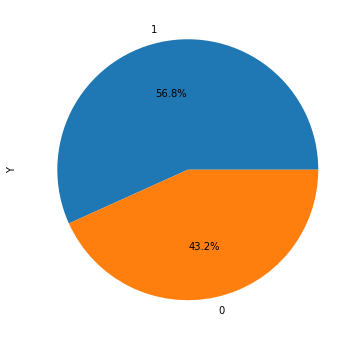

In [20]:
plt.figure(figsize=(6,6))
data['Y'].value_counts().plot.pie(autopct="%1.1f%%")

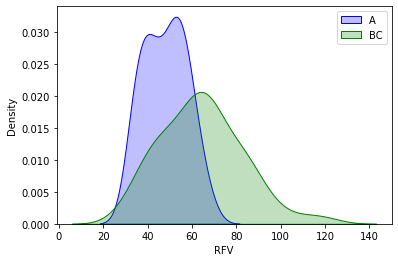

In [21]:
g = sns.kdeplot(data["RFV"][(data["Y"] == 0) & (data["RFV"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(data["RFV"][(data["Y"] == 1) & (data["RFV"].notnull())], ax =g, color="Green", shade= True)
g.set_xlabel("RFV")
g.set_ylabel("Density")
g = g.legend(["A","BC"])

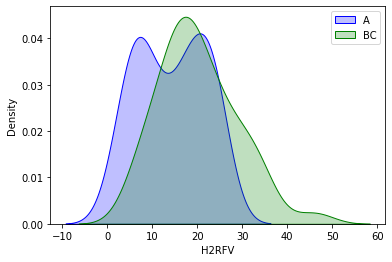

In [22]:
g = sns.kdeplot(data["H2RFV"][(data["Y"] == 0) & (data["H2RFV"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(data["H2RFV"][(data["Y"] == 1) & (data["H2RFV"].notnull())], ax =g, color="Green", shade= True)
g.set_xlabel("H2RFV")
g.set_ylabel("Density")
g = g.legend(["A","BC"])

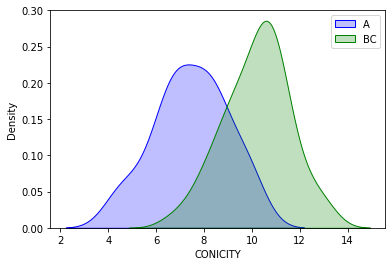

In [23]:
g = sns.kdeplot(data["CONICITY"][(data["Y"] == 0) & (data["CONICITY"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(data["CONICITY"][(data["Y"] == 1) & (data["CONICITY"].notnull())], ax =g, color="Green", shade= True)
g.set_xlabel("CONICITY")
g.set_ylabel("Density")
g = g.legend(["A","BC"])

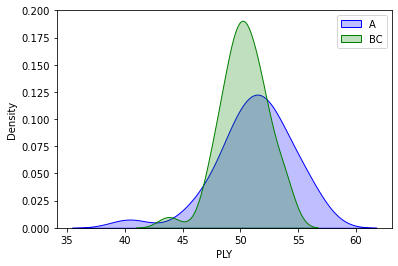

In [24]:
g = sns.kdeplot(data["PLY"][(data["Y"] == 0) & (data["PLY"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(data["PLY"][(data["Y"] == 1) & (data["PLY"].notnull())], ax =g, color="Green", shade= True)
g.set_xlabel("PLY")
g.set_ylabel("Density")
g = g.legend(["A","BC"])

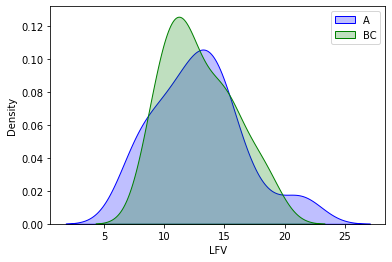

In [25]:
g = sns.kdeplot(data["LFV"][(data["Y"] == 1) & (data["LFV"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(data["LFV"][(data["Y"] == 0) & (data["LFV"].notnull())], ax =g, color="Green", shade= True)
g.set_xlabel("LFV")
g.set_ylabel("Density")
g = g.legend(["A","BC"])

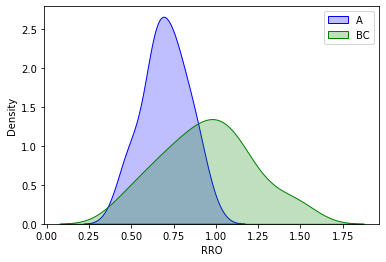

In [26]:
g = sns.kdeplot(data["RRO"][(data["Y"] == 0) & (data["RRO"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(data["RRO"][(data["Y"] == 1) & (data["RRO"].notnull())], ax =g, color="Green", shade= True)
g.set_xlabel("RRO")
g.set_ylabel("Density")
g = g.legend(["A","BC"])

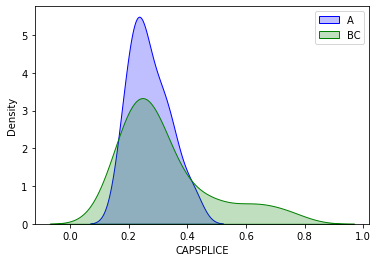

In [27]:
g = sns.kdeplot(data["CAPSPLICE"][(data["Y"] == 0) & (data["CAPSPLICE"].notnull())], color="Blue", shade = True)
g = sns.kdeplot(data["CAPSPLICE"][(data["Y"] == 1) & (data["CAPSPLICE"].notnull())], ax =g, color="Green", shade= True)
g.set_xlabel("CAPSPLICE")
g.set_ylabel("Density")
g = g.legend(["A","BC"])

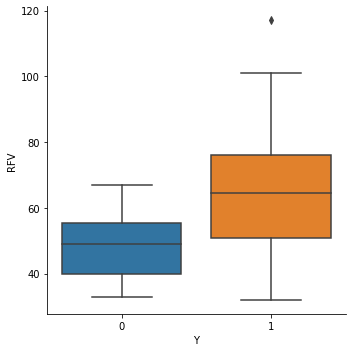

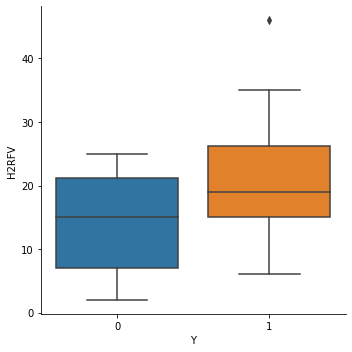

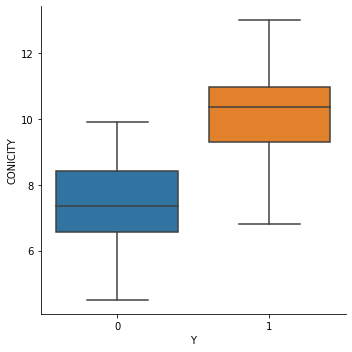

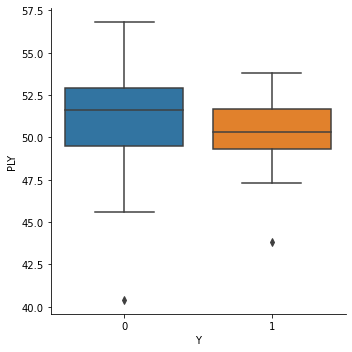

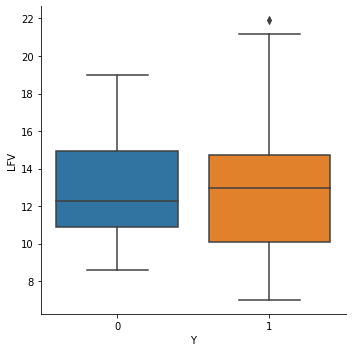

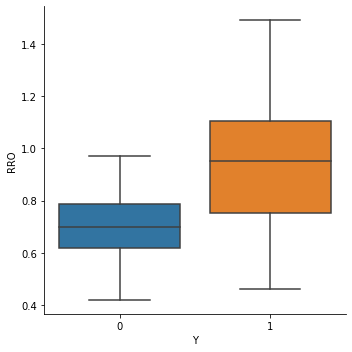

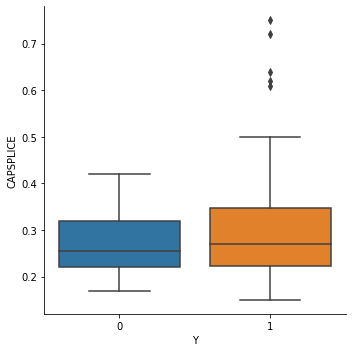

In [28]:
warnings.filterwarnings('ignore')
orders = [0, 1]
g = sns.factorplot(y="RFV",x="Y",data=data,kind="box", order = orders)
g = sns.factorplot(y="H2RFV",x="Y", data=data,kind="box", order = orders)
g = sns.factorplot(y="CONICITY",x="Y",data=data,kind="box", order = orders)
g = sns.factorplot(y="PLY",x="Y", data=data,kind="box", order = orders)
g = sns.factorplot(y="LFV",x="Y", data=data,kind="box", order = orders)
g = sns.factorplot(y="RRO",x="Y", data=data,kind="box", order = orders)
g = sns.factorplot(y="CAPSPLICE",x="Y", data=data,kind="box", order = orders)

Correlations

In [29]:
X_train

,RFV,H2RFV,CONICITY,PLY,LFV,RRO,CAPSPLICE
1,46,23,4.5,56.0,13.0,0.77,0.17
6,55,35,12.1,51.3,14.7,0.79,0.20
72,83,6,9.3,51.0,11.9,1.24,0.21
88,32,19,11.0,50.4,15.5,0.47,0.17
20,55,7,9.7,49.8,15.1,0.80,0.26
...,...,...,...,...,...,...,...
12,40,8,6.8,54.3,14.8,0.51,0.25
64,101,46,10.9,52.2,17.3,1.48,0.27
46,44,14,8.6,54.1,12.4,0.62,0.24
32,40,8,10.9,50.6,14.0,0.68,0.23


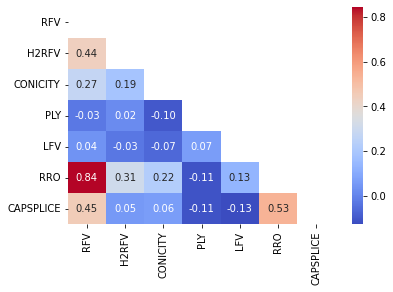

In [21]:
corrmat = np.triu(X_train.corr(method='pearson'))

data_cor = X_train.copy()

g = sns.heatmap(data_cor.corr(method='pearson'),cmap="coolwarm",annot=True, mask = corrmat, fmt=".2f")

In [22]:
data_cor.corr(method='pearson')

,RFV,H2RFV,CONICITY,PLY,LFV,RRO,CAPSPLICE
RFV,1.000000,0.436974,0.273539,-0.026422,0.036681,0.844144,0.451586
H2RFV,0.436974,1.000000,0.187352,0.020179,-0.030466,0.305579,0.053039
CONICITY,0.273539,0.187352,1.000000,-0.100166,-0.065154,0.224127,0.064838
PLY,-0.026422,0.020179,-0.100166,1.000000,0.065895,-0.110598,-0.108576
LFV,0.036681,-0.030466,-0.065154,0.065895,1.000000,0.131971,-0.127157
RRO,0.844144,0.305579,0.224127,-0.110598,0.131971,1.000000,0.534016
CAPSPLICE,0.451586,0.053039,0.064838,-0.108576,-0.127157,0.534016,1.000000


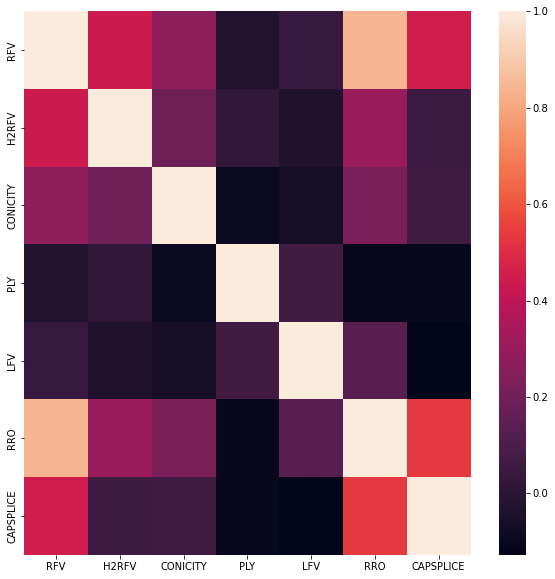

In [23]:
top_num_features = data_cor.columns.to_list()
corrmat = data[top_num_features].corr()

plt.figure(figsize=(10,10))
sns.heatmap(corrmat);

### Mutual information

In [24]:
from sklearn.feature_selection import SelectKBest, SelectPercentile, mutual_info_classif

In [25]:
selector = SelectKBest(mutual_info_classif, k=7)
X_reduced = selector.fit_transform(X_train, y_train)
X_reduced.shape
cols = selector.get_support(indices=True)
selected_columns = X_train.iloc[:,cols].columns.tolist()
selected_columns

['RFV', 'H2RFV', 'CONICITY', 'PLY', 'LFV', 'RRO', 'CAPSPLICE']

In [26]:
threshold = 10  # the number of most relevant features
high_score_features = []
feature_scores = mutual_info_classif(X_train, y_train, random_state=0)
for score, f_name in sorted(zip(feature_scores, X_train.columns), reverse=True)[:threshold]:
        print(f_name, score)
        high_score_features.append(f_name)
df_wine_norm_mic = X_train[high_score_features]
print(df_wine_norm_mic.columns)

CONICITY 0.25136458331699285
RFV 0.206417755554261
RRO 0.17028071519608767
H2RFV 0.10961494064142419
LFV 0.0012659850702467779
PLY 0.0
CAPSPLICE 0.0
Index(['CONICITY', 'RFV', 'RRO', 'H2RFV', 'LFV', 'PLY', 'CAPSPLICE'], dtype='object')


In [27]:
def Scatterplot(data, var1, var2, cat):

    fig = px.scatter(data, x = var1, y = var2, color =cat, width = 800)
    fig.update_traces(marker=dict(size = 12,line = dict(width = 1)),selector=dict(mode = 'markers'))
    fig.update_layout(title = 'Scatterplot: ' + var1 + " vs " + var2)
    fig.update_xaxes(title = var1)
    fig.update_yaxes(title = var2)
    fig.show()

In [29]:
Scatterplot(data, "RFV", "RRO",  "Y")

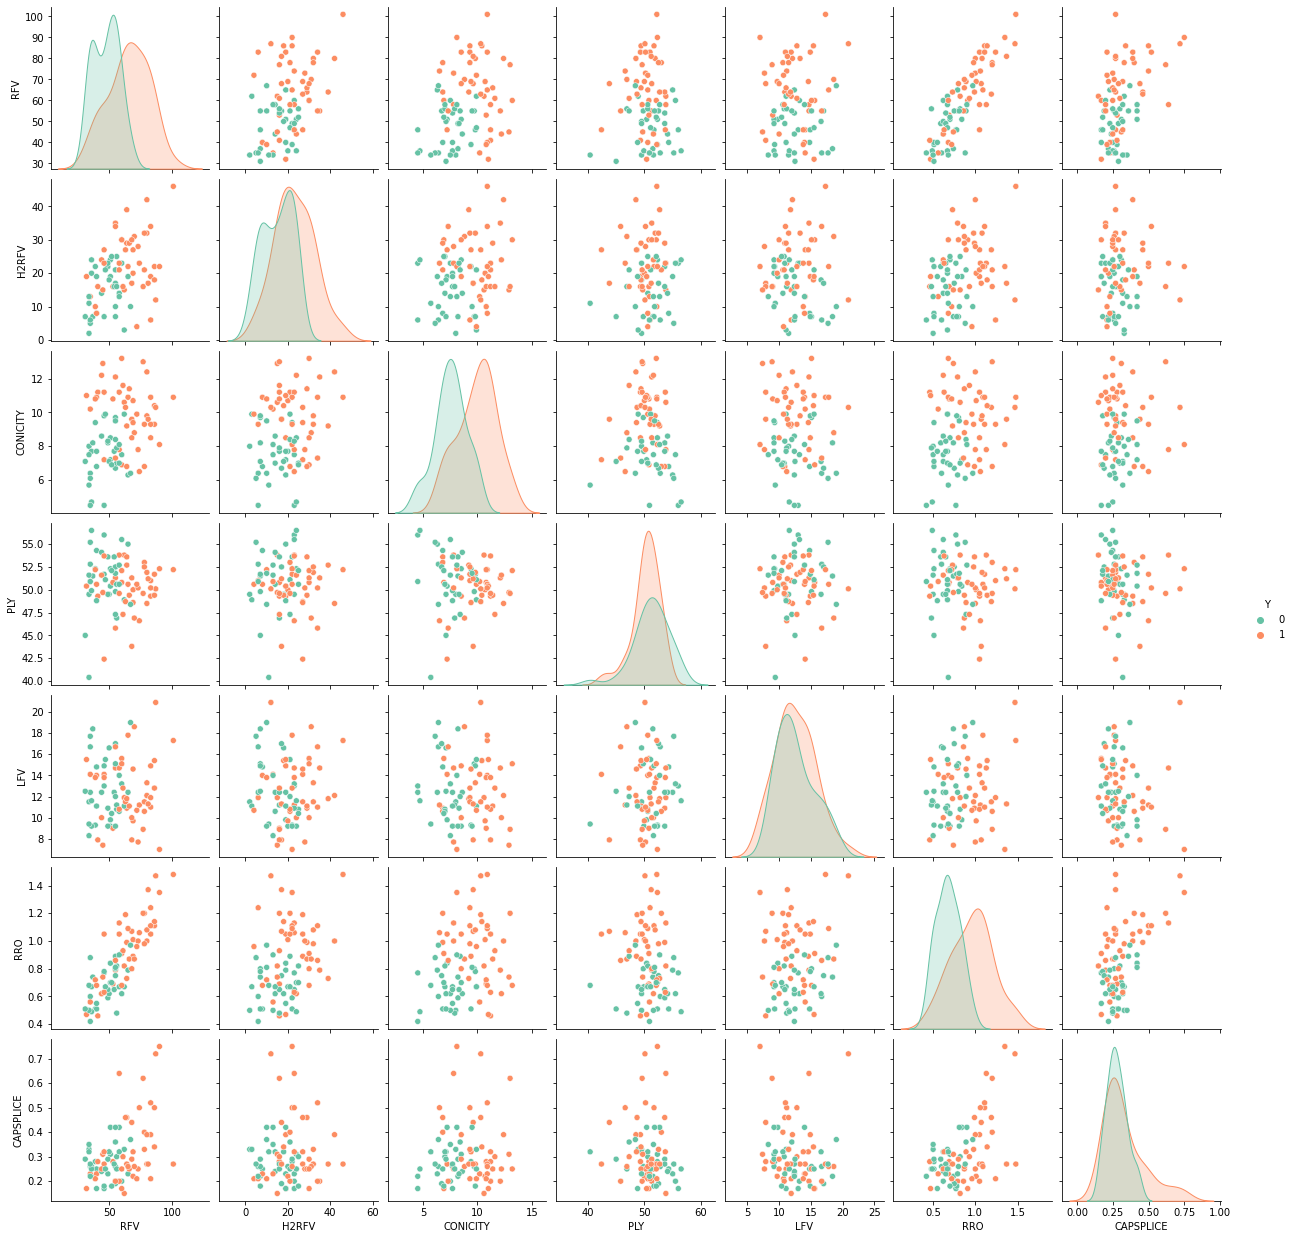

In [30]:
g = sns.pairplot(data, hue="Y", palette="Set2", diag_kind="kde", height=2.5)

In [8]:
fig = px.scatter_3d(data, x="H2RFV", y="CONICITY",z="RRO",
                    color= "Y")

fig.show()

In [9]:
fig = px.scatter_3d(data, x="H2RFV", y="CONICITY",z="RFV",
                    color= "Y")

fig.show()